In [19]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
iris=load_iris()
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
x=pd.DataFrame(iris.data,columns=iris.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=pd.DataFrame(iris.target,columns=['species'])
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [10]:
y.species.unique()

array([0, 1, 2])

In [13]:
y.species.replace({0:'setosa',1:'versicolor',2:'virginica'},inplace=True)
y.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
df=pd.concat([x,y],axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal length (cm)', ylabel='Density'>

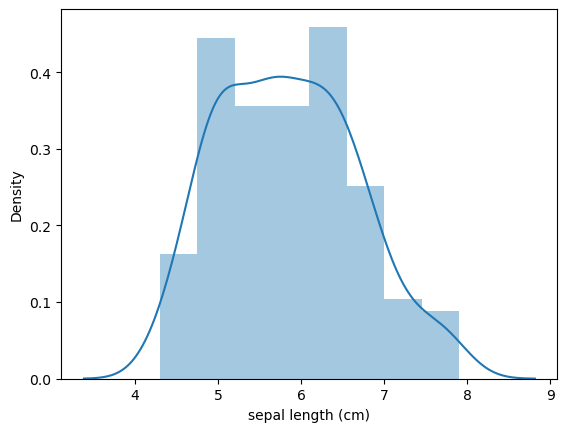

In [20]:
sns.distplot(df['sepal length (cm)'])

<Axes: xlabel='petal length (cm)', ylabel='Density'>

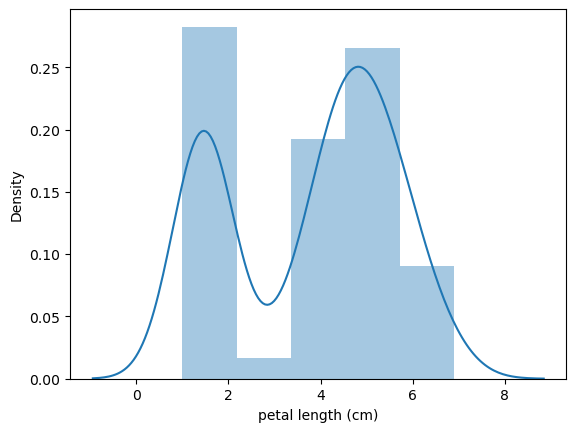

In [23]:
sns.distplot(df['petal length (cm)'])

In [30]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [31]:
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
x[:]=Scaler.fit_transform(x)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [44]:
from sklearn.decomposition import PCA
pca=PCA(0.98)
Xpca=pca.fit_transform(X)
Xpca[:10]

array([[-0.63070293,  0.10757791],
       [-0.62290494, -0.10425983],
       [-0.6695204 , -0.05141706],
       [-0.65415276, -0.10288487],
       [-0.64878806,  0.13348758],
       [-0.53527278,  0.28961572],
       [-0.65653779,  0.01072449],
       [-0.6257805 ,  0.05713354],
       [-0.6756435 , -0.20070328],
       [-0.64564462, -0.06720801]])

In [43]:
X=pd.DataFrame(Xpca,columns=['PC1','PC2'])
X.head()

,PC1,PC2
0,-0.630703,0.107578
1,-0.622905,-0.104260
2,-0.669520,-0.051417
3,-0.654153,-0.102885
4,-0.648788,0.133488


In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train.shape,X_test.shape

((120, 2), (30, 2))

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [51]:
def kfold(estimator,inp,tar):
    return cross_val_score(estimator,inp,tar).mean()*100

In [52]:
kfold(LogisticRegression(),X_train,y_train)

86.66666666666669

In [54]:
kfold(RandomForestClassifier(),X_train,y_train)

95.0

In [55]:
kfold(SVC(),X_train,y_train)

95.83333333333334

In [56]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(SVC(),{
    'C':[0.5,1,2,3]
})
clf.fit(X_train,y_train)
    

GridSearchCV(estimator=SVC(), param_grid={'C': [0.5, 1, 2, 3]})

In [57]:
clf_df=pd.DataFrame(clf.cv_results_)

In [59]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [61]:
clf_df[['param_C','mean_test_score']].sort_values(by='mean_test_score',ascending=False)

,param_C,mean_test_score
0,0.5,0.958333
1,1,0.958333
2,2,0.958333
3,3,0.958333


In [63]:
model=SVC(C=0.5)
model.fit(X_train,y_train)

SVC(C=0.5)

In [65]:
model.score(X_test,y_test)*100

96.66666666666667

In [66]:
pred=model.predict(X_test)

In [69]:
y_test[:5]

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


In [70]:
pred[:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(50.722222222222214, 0.5, 'Actual')

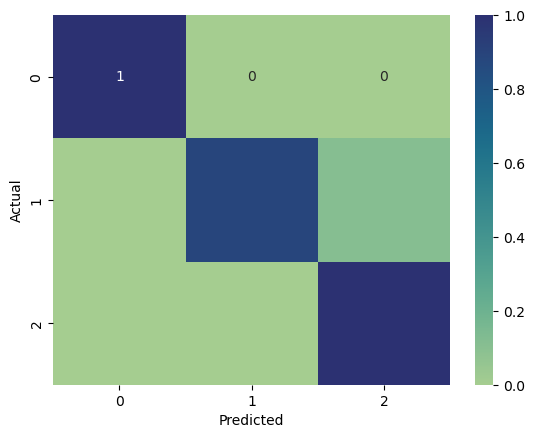

In [76]:
cf=confusion_matrix(y_test,pred,normalize='true')
sns.heatmap(cf,annot=True,cmap='crest');
plt.xlabel('Predicted');
plt.ylabel('Actual')